In [0]:
#instalamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib
from pathlib import Path
import shutil

In [0]:
#Leemos la carpeta buscando los archivos con el formato de 2022-09*.csv para leer solo septiembre.
count = 0
sales_files_import = pd.DataFrame()

for sales_file in Path('/dbfs/mnt/Lake/LZ/PRD/SD/SKU_ML').glob("2022-09*.csv"):
  file_data = pd.read_csv(sales_file, low_memory = False, header = None, skiprows = 1)
  sales_files_import = sales_files_import.append(file_data, ignore_index = True)
  count +=1
count

Out[5]: 24

In [0]:
#leemos un archivo con nrows = 0 para leer solo las columnas
df1 = pd.read_csv('/dbfs/mnt/Lake/LZ/PRD/SD/SKU_ML/2022-09-01.csv', low_memory=False, nrows=0)

In [0]:
#insertamos las columnas en el dataframe completo
sales_files_import.columns = df1.columns

In [0]:
sales_files_import.head()

Out[9]:

,Id,Create_Date,Modify_User,Create_User,Modify_Date,GUID_CAB,GUID_DET,NumeroPedido,Fecha,Hora,Cliente,Material,Stock,Sugerido,Venta,Peso,Precio,Tipo,Motivo,Region,Sucursal,Ruta
0,220690337,2022-08-31 23:59:00.8570000,NaN,NaN,NaN,401324220831070004,12208311858271,1661990313132434,20220831,185835,7856972,988,5.0,1.0,0.0,0.000,0.0,P,02,CTO,ZET,401324
1,220690338,2022-08-31 23:59:00.8570000,NaN,NaN,NaN,401324220831070004,12208311858271,1661990313132434,20220831,185843,7856972,7002,5.0,0.0,1.0,0.295,23.0,M,,CTO,ZET,401324
2,220690339,2022-08-31 23:59:03.1070000,NaN,NaN,NaN,403209220829075117,12208311849571,16619898063209147,20220831,185014,7327202,233,43.0,3.0,0.0,0.000,0.0,H,02,NTE,MNT,403209
3,220690340,2022-08-31 23:59:03.1070000,NaN,NaN,NaN,403209220829075117,12208311849571,16619898063209147,20220831,185232,7327202,1768,25.0,0.0,NaN,0.324,31.3,M,NaN,NTE,MNT,403209
4,220690341,2022-08-31 23:59:03.1070000,NaN,NaN,NaN,403209220829075117,12208311849571,16619898063209147,20220831,185232,7327202,603,45.0,0.0,6.0,0.600,13.2,M,,NTE,MNT,403209


In [0]:
#seleccionamos las columnas que nos interesan
df = sales_files_import[['Create_Date','NumeroPedido','Fecha','Hora','Cliente','Material','Stock','Sugerido','Venta','Peso','Precio','Tipo','Motivo','Region','Sucursal','Ruta']]

In [0]:
#Signifcado de los valores de Tipo y Motivo
#Tipo: M=Manual, B= Basico, H=Historico, P=Potencial, L=Lanzamiento, BD= Basico destacado, HD=Historico Destacado, PD=Potencial destacado
#Motivo: 01=No tenia en stock, 02=Se elimino manualmente

In [0]:
#Separamos los dos motivos y un dataframe con ambos
dfF1=df[df["Motivo"] == '01']
dfF2=df[df["Motivo"] == '02']
dfF3=dfF1.append(dfF2, ignore_index=True)


Out[12]:

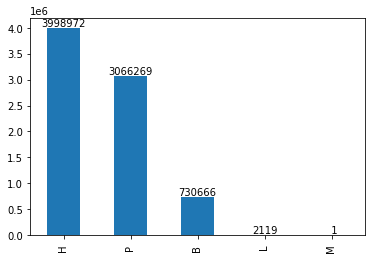

[Text(0, 0, '3998972'),
 Text(0, 0, '3066269'),
 Text(0, 0, '730666'),
 Text(0, 0, '2119'),
 Text(0, 0, ' 1')]

In [0]:
#mostramos los registros de cada tipo
ax = dfF3["Tipo"].value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0], fmt='%3d')

Out[13]:

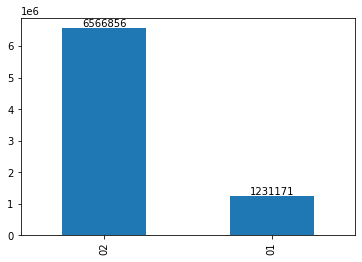

[Text(0, 0, '6566856'), Text(0, 0, '1231171')]

In [0]:
#Mostramos los registros de cada motivo
ax = dfF3["Motivo"].value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0], fmt='%3d')

In [0]:
#usando el dataframe de registros eliminados
#tomamos el material y agregamos un contador
dfMatElimin = dfF2[['Material']]
dfMatElimin['Contador'] = 1
dfMatElimin2 = dfMatElimin.groupby(by=["Material"], as_index=False).sum()


<command-1229756496478509>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 dfMatElimin['Contador'] = 1

Out[15]:

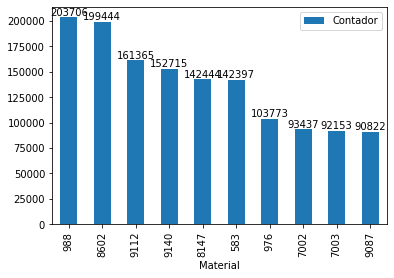

[Text(0, 0, '203706'),
 Text(0, 0, '199444'),
 Text(0, 0, '161365'),
 Text(0, 0, '152715'),
 Text(0, 0, '142444'),
 Text(0, 0, '142397'),
 Text(0, 0, '103773'),
 Text(0, 0, '93437'),
 Text(0, 0, '92153'),
 Text(0, 0, '90822')]

In [0]:
#Agrupamos por el material para saber cuales son los materiales que mas se eliminan de la aplicacion
ax = dfMatElimin2.sort_values(by=['Contador'], ascending=False).head(10).plot(kind="bar", x='Material', y='Contador')
ax.bar_label(ax.containers[0], fmt='%3d')

<command-1229756496478511>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 dfMatStock['Contador'] = 1
Out[16]:

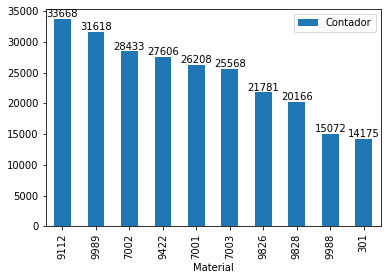

[Text(0, 0, '33668'),
 Text(0, 0, '31618'),
 Text(0, 0, '28433'),
 Text(0, 0, '27606'),
 Text(0, 0, '26208'),
 Text(0, 0, '25568'),
 Text(0, 0, '21781'),
 Text(0, 0, '20166'),
 Text(0, 0, '15072'),
 Text(0, 0, '14175')]

In [0]:
#usando el dataframe de fuera de stock, mostramos los materiales que mas se repiten con ese motivo
dfMatStock = dfF1[['Material']]
dfMatStock['Contador'] = 1
dfMatStock2 = dfMatStock.groupby(by=["Material"], as_index=False).sum()
ax = dfMatStock2.sort_values(by=['Contador'], ascending=False).head(10).plot(kind="bar", x='Material', y='Contador')
ax.bar_label(ax.containers[0], fmt='%3d')


In [0]:
#calculamos falta de stock
df['StockXSugerido'] = df['Stock']-df['Sugerido']

<command-822458489659607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 df['StockXSugerido'] = df['Stock']-df['Sugerido']

Out[18]:

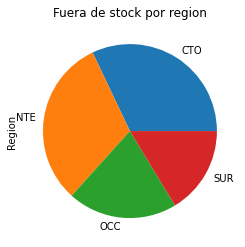

CTO 1069265
NTE 1042637
OCC 679016
Name: Region, dtype: int64

In [0]:
#filtramos por los registros donde no se tuvo stock y lo vemos por region
dfNegativo=df[df["StockXSugerido"] <0]

ax = dfNegativo['Region'].value_counts().plot(kind="pie", title="Fuera de stock por region")
pieRegion = dfNegativo['Region'].value_counts()

region = pieRegion.head(1).to_frame().reset_index()
regionMayor = region['index'].head(1)[0]

pieRegion.head(3)

La region con menos stock es: CTO
Out[19]:

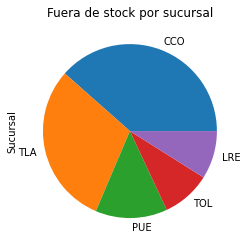

CCO 276585
TLA 216575
PUE 96095
Name: Sucursal, dtype: int64

In [0]:
#tomando la region mas grande, podemos ver las sucurales
print("La region con menos stock es: " + regionMayor)
dfNegativoRegion = dfNegativo[dfNegativo['Region']==regionMayor]


ax = dfNegativoRegion['Sucursal'].value_counts().sort_values(ascending=False).head().plot(kind="pie", title="Fuera de stock por sucursal")
pieReg = dfNegativoRegion['Sucursal'].value_counts()
suc = pieReg.head(1).to_frame().reset_index()
sucursalMayor = suc['index'].head(1)[0]
pieReg.head(3)

La sucursal de la region: CTOcon menos estock es: CCO
Out[20]:

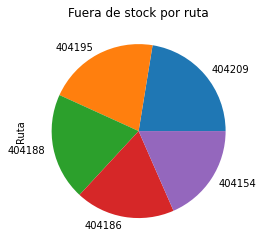

404209 8375
404195 7755
404188 7430
Name: Ruta, dtype: int64

In [0]:
#tomando la sucursal mas grande, vemos las rutas
print("La sucursal de la region: " + regionMayor + "con menos estock es: " + sucursalMayor)
dfNegativoRegionSuc = dfNegativoRegion[dfNegativoRegion['Sucursal']==sucursalMayor]

ax = dfNegativoRegionSuc['Ruta'].value_counts().sort_values(ascending=False).head().plot(kind="pie", title="Fuera de stock por ruta")
pieSuc = dfNegativoRegionSuc['Ruta'].value_counts()
rut = pieSuc.head(1).to_frame().reset_index()
rutaMayor = rut['index'].head(1)[0]
pieSuc.head(3)


La Ruta de la region: CTO y sucursal: CCOcon menos estock es: 404209
Out[21]:

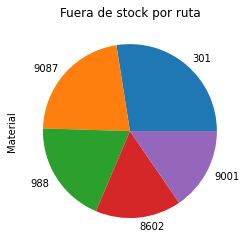

301 367
9087 294
988 255
Name: Material, dtype: int64

In [0]:
#tomando la ruta mas grande, vemos los productos
print("La Ruta de la region: " + regionMayor + " y sucursal: " + sucursalMayor +  "con menos estock es: " + str(rutaMayor))
dfNegativoRegionSucRuta = dfNegativoRegionSuc[dfNegativoRegionSuc['Ruta']==rutaMayor]
dfNegativoRegionSucRuta.count()
ax = dfNegativoRegionSucRuta['Material'].value_counts().sort_values(ascending=False).head().plot(kind="pie", title="Fuera de stock por ruta")
pieRut = dfNegativoRegionSucRuta['Material'].value_counts()

pieRut.sort_values(ascending=False).head(3)

In [0]:
#Numero de registros usamos en cada paso
print("Registros crudos")
print(len(sales_files_import.axes[0]))
print("Registros de Tipo 1")
print(len(dfF1.axes[0]))
print("Registros de Tipo 2")
print(len(dfF2.axes[0]))
print("Registros de Tipo 1 y Tipo 2")
print(len(dfF3.axes[0]))
print("Registros con stock negativo")
print(len(dfNegativo.axes[0]))
print("Registros con stock negativo de la region: " + regionMayor + " con mas stock negativo")
print(len(dfNegativoRegion.axes[0]))
print("Registros con stock negativo de la region: " + regionMayor + "  y sucursal: " + sucursalMayor + " con mas stock negativo")
print(len(dfNegativoRegionSuc.axes[0]))
print("Registros con stock negativo de la region: " + regionMayor + ", sucursal: " + sucursalMayor + " y ruta: " + str(rutaMayor) + " con mas stock negativo es")
print(len(dfNegativoRegionSucRuta.axes[0]))

Registros crudos
18338736
Registros de Tipo 1
1231171
Registros de Tipo 2
6566856
Registros de Tipo 1 y Tipo 2
7798027
Registros con stock negativo
3335397
Registros con stock negativo de la region: CTO con mas stock negativo
1069265
Registros con stock negativo de la region: CTO y sucursal: CCO con mas stock negativo
276585
Registros con stock negativo de la region: CTO, sucursal: CCO y ruta: 404209 con mas stock negativo es
8375

In [0]:
#Calculamos memoria del dataframe principal
print("Peso del archivo crudo con " + str((len(sales_files_import.axes[0]))) + " registros")
baits =  sales_files_import.memory_usage(index=True, deep=True).sum()
megas = baits/1000000
gigas = megas/1000
print("Peso en bytes")
print(str(baits) + " bytes")
print("Peso en megas")
print(str(megas) + " megas")
print("Peso en Gigas")
print(str(gigas) + " gigas")


Peso del archivo crudo con 18338736 registros
Peso en bytes
8365403679 bytes
Peso en megas
8365.403679 megas
Peso en Gigas
8.365403679 gigas